In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('granulite')
model_names

['sun_19_ds15_2_granulite',
 'sun_19_ds16_2_granulite',
 'sun_19_ds16_1_low_granulite',
 'sun_19_ds16_1_high_granulite',
 'sun_19_ds17_2_low_granulite',
 'sun_19_ds17_2_high_granulite',
 'sun_19_ds17_3_low_granulite',
 'sun_19_ds17_3_high_granulite']

# Exploring Pyrrhenious's Granulite Models Database Correspondence

Here we look at Plagioclaise models parameterization correspondence of:

 * Sun et al., 2019. Effect of temperature, pressure and chemical composition on the electrical conductivity of granulite and geophysical implications


## Sun et al., 2019

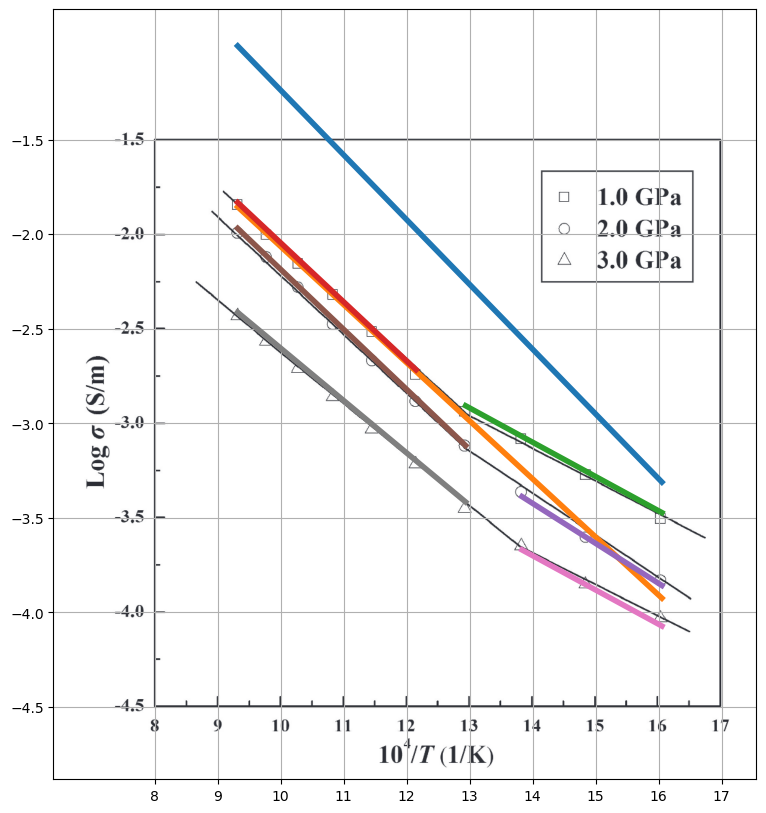

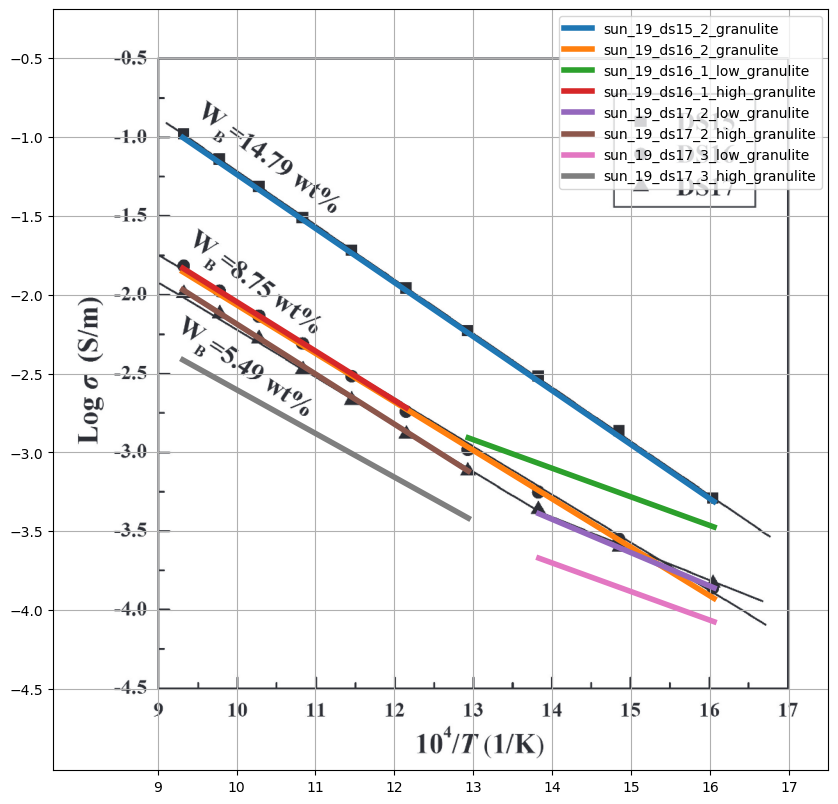

In [3]:
ec_model_row = ecdatabase.get_model_properties('sun_19_ds15_2_granulite')

pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(400,1400,num=100,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ecdatabase.get_model_list_for_phase('granulite'):
        ec_model_row = ecdatabase.get_model_properties(model)

        temperature_range=np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
        c1 = ecdatabase.get_model(model).get_conductivity(T=temperature_range)
        ax.plot(1e4/temperature_range,np.log10(c1),label=model,linewidth=4)
plt.legend()    
        
    